<a href="https://colab.research.google.com/github/FranciscoRMendes/graph_networks/blob/main/GCN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
# !pip install trimesh
# !pip install torch

In [18]:
import torch
import torch.nn as nn
import torch.optim as optim
import trimesh

from graph_networks.SpectralGCN import SpectralGCN
from graph_networks.build_graph import create_adjacency_matrix
from graph_networks.heat import simulate_heat, visualize_heat, simulate_heat_with_even_sensors, visualize_heat_at_sensors, visualize_low_high_freq, visualize_heat_single_step_zoom
import random

In [19]:
mesh = trimesh.creation.torus(major_radius=10, minor_radius=0.01)

In [20]:
mesh = trimesh.creation.torus(major_radius=10, minor_radius=0.01)

adj, L = create_adjacency_matrix(mesh)

# Laplacian eigendecomposition
Lambda, U = torch.linalg.eigh(L)

In [21]:
X_heat_nan, X_heat, sensor_indices = simulate_heat_with_even_sensors(mesh = mesh,steps=40, num_sensors=750)

In [22]:
model = SpectralGCN(len(mesh.vertices))
trained_model = model.fit(X_heat_nan,U)

[Epoch 0] Loss: 0.000352
[Epoch 50] Loss: 0.000031
[Epoch 100] Loss: 0.000017
[Epoch 150] Loss: 0.000015
[Epoch 200] Loss: 0.000015
[Epoch 250] Loss: 0.000015


In [23]:
x_pred_seq = trained_model.predict(X_heat, U, enforce_energy=False)

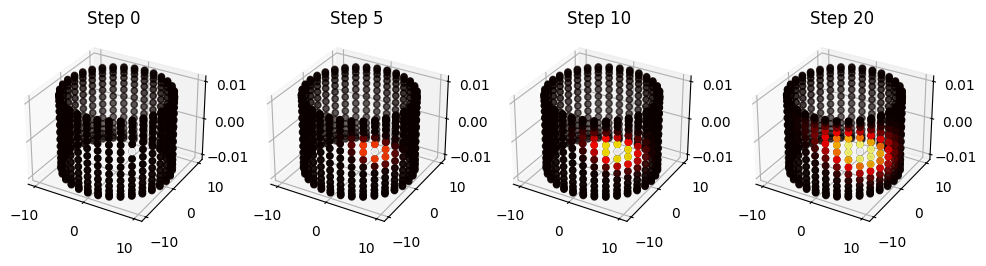

In [24]:
visualize_heat(mesh, X_heat)

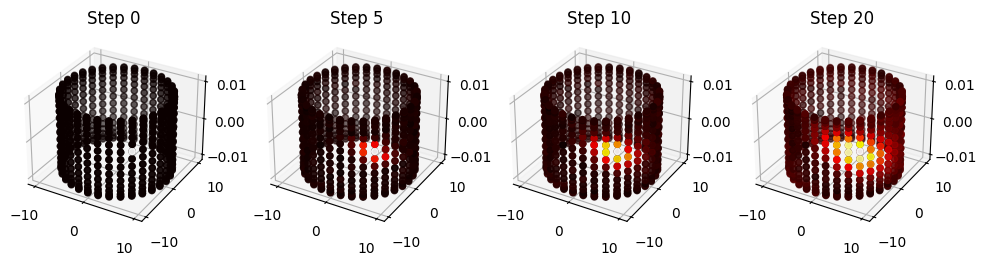

In [25]:
visualize_heat(mesh, x_pred_seq)

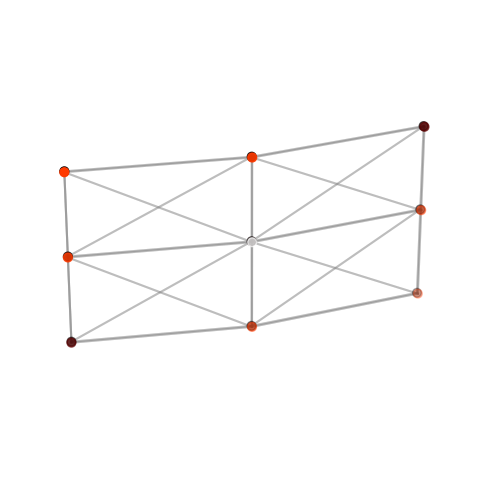

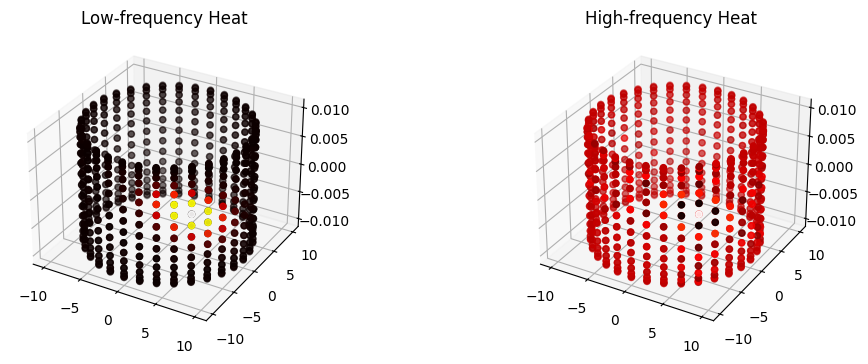

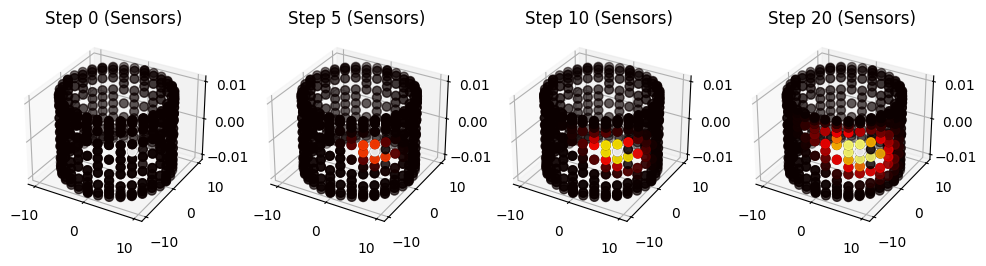

In [26]:
visualize_heat_single_step_zoom(mesh, X_heat)
visualize_low_high_freq(mesh, X_heat, U, Lambda, step=10, low_ratio=0.3, high_ratio=0.3)
visualize_heat_at_sensors(mesh, X_heat, sensor_indices)
